In [1]:
import sys
import pickle
sys.path.append('..')    
from models import BaseDenseNet
from models import ConvDenseNet
from core import ImageGenerator
from utils.plot import *
from utils.model import *

%matplotlib inline

A
B


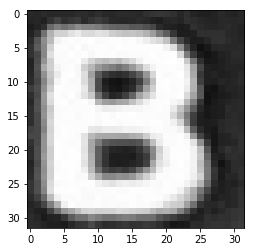

C
D


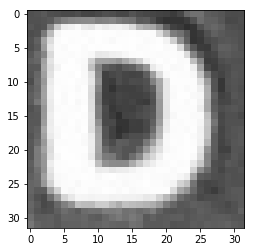

E


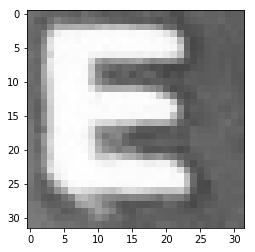

F


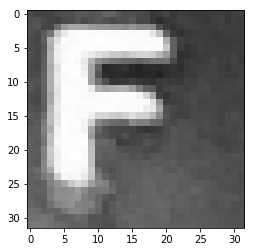

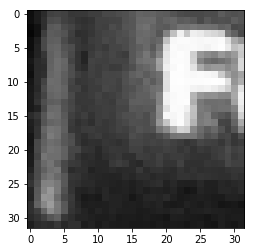

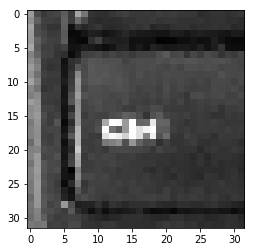

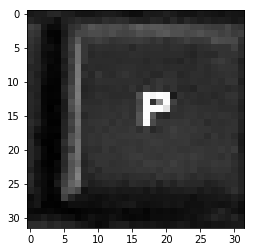

G


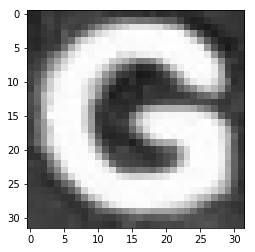

H


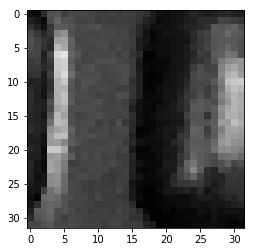

I
J
K
L
M
N


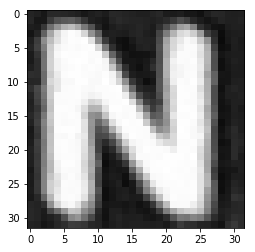

O


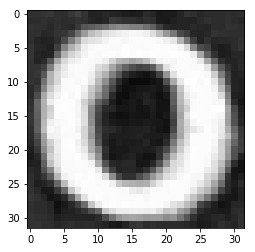

P
Q


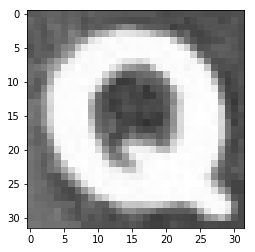

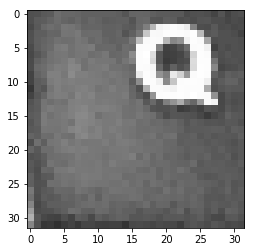

R


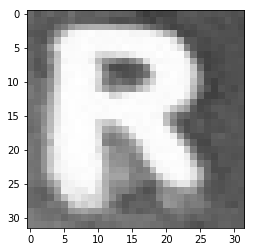

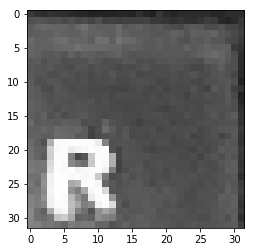

S


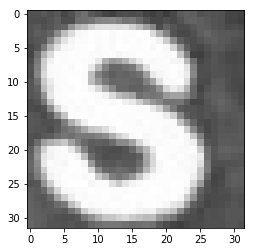

T


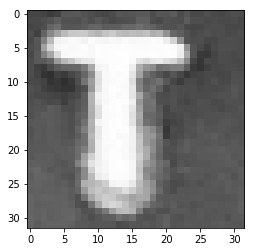

U
V


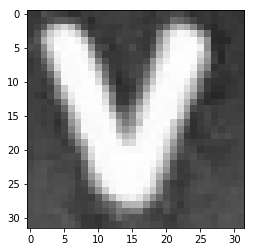

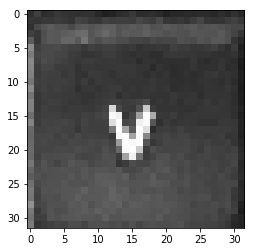

W


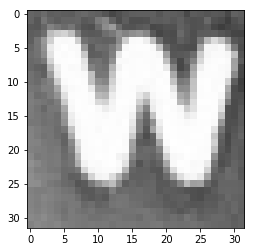

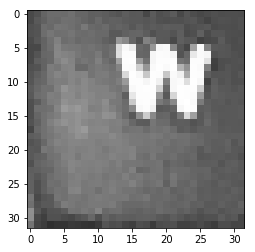

X


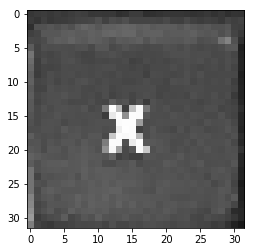

Y
Z


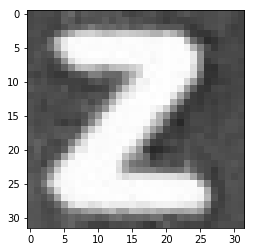

0
1


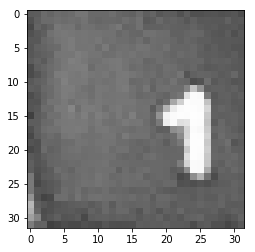

2
3
4
5
6
7


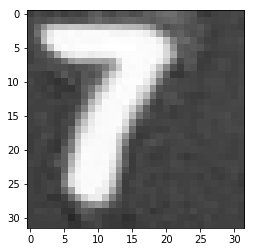

8


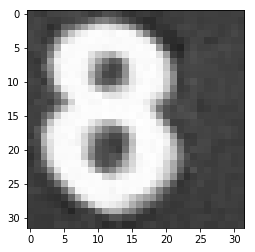

9


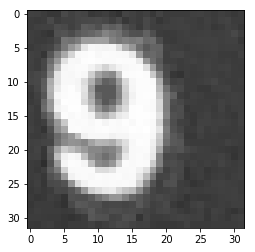

In [2]:
def test_model(model, filename, from_range, to_range):
    fragment_list = pickle.load(open(filename, 'rb'))
    image_list = map(lambda x: x[1], fragment_list)
    image_data = np.array(image_list, dtype=np.float64).reshape(-1, 1, 32, 32)
    image_data = image_data[from_range:to_range, :, : :]
    output_data = get_output_data(model, image_data)
    plot_all_above_threshold(image_data, output_data, 0.99)

model = load_base_dense_net('../state_dicts/eval/in_place_m20_base_dense.pt', 20)
model.eval()
test_model(model, '../key_images/key0.p', 0, 1000)

In [5]:
image_data = np.array(Image.open('generators/in_place_generator.jpg'), dtype=np.float64)
plt.figure(figsize=(16, 12))
plt.imshow(image_data, cmap='gray', vmin=0, vmax=255)               
plt.show()
image_data = image_data.reshape(1, 1, image_data.shape[0], image_data.shape[1])
plt.imshow(image_data[0, 0, 608:, 608:], cmap='gray', vmin=0, vmax=255)               
plt.show()
output_data = get_output_data(model, image_data)
output_ind = np.argsort(output_data)
for i in range(20):
    print(encode_class(output_ind[i, -1]))

IOError: [Errno 2] No such file or directory: 'generators/in_place_generator.jpg'

In [ ]:
image_data = np.array(Image.open('generators/in_place_generator.jpg'), dtype=np.float64)
image_data = np.split(image_data, 20)
image_data = np.array(map(lambda x: np.split(x, 20, axis=1), image_data))
image_data = image_data.reshape(-1, 1, 32, 32)
var_data = Variable(torch.FloatTensor(image_data).cuda())
output_data = model(var_data)
output_data = output_data.cpu().data.numpy()
output_ind = np.argsort(output_data)
for i in range(20):
    print(encode_class(output_ind[i, -1]))